In [2]:
import os
import datetime
import pytz

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from scipy.signal import find_peaks

In [3]:
def is_gzip_file(filepath):
    with open(filepath, 'rb') as f:
        return f.read(2) == b'\x1f\x8b'

In [4]:
mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['axes.grid'] = False

In [5]:
csv_path = tf.keras.utils.get_file(
    origin='https://itsci.mju.ac.th/downloads/watcharin/datasets/pv/device-1.csv.tar.gz')
    #origin='https://itsci.mju.ac.th/downloads/watcharin/datasets/pv/export_device_1_basic_aggregated_15minutes.csv.gz')
csv_path

'C:\\Users\\ASUS\\.keras\\datasets\\device-1.csv.tar.gz'

In [6]:
if is_gzip_file(csv_path):
  # Read the data directly into a pandas DataFrame
  df = pd.read_csv(csv_path, compression='gzip')
else:
  # Read the data without compression
  df = pd.read_csv(csv_path)

row_count = df.shape[0]
print(f"Total rows: {row_count}")

# Rename the first column to 'new_name'
df = df.rename(columns={df.columns[0]: 'datetime'})

# Optional: Print the new column names to verify
print(df.columns)

df.head(5)

Total rows: 80118
Index(['datetime', 'ambient_temperature', 'current_power',
       'current_value_of_consumption', 'external_energy_supply',
       'grid_feed_in', 'internal_power_supply', 'self_consumption',
       'temperature_measurement', 'total_irradiation'],
      dtype='object')


,datetime,ambient_temperature,current_power,current_value_of_consumption,external_energy_supply,grid_feed_in,internal_power_supply,self_consumption,temperature_measurement,total_irradiation
0,2021-11-06 11:15:00,30.288889,46519.355556,37280.422222,NaN,9238.933333,37280.422222,37280.422222,58.022222,798.444444
1,2021-11-06 11:30:00,30.076923,47600.714286,39472.626374,NaN,9397.756098,39132.406593,39132.406593,58.263736,812.571429
2,2021-11-06 11:45:00,30.629213,47056.988764,32669.393258,NaN,14387.595506,32669.393258,32669.393258,57.235955,807.224719
3,2021-11-06 12:00:00,31.021978,48415.835165,36126.516484,NaN,12289.318681,36126.516484,36126.516484,56.846154,817.527473
4,2021-11-06 12:15:00,31.831461,49345.404494,36879.966292,NaN,12465.438202,36879.966292,36879.966292,55.842697,816.651685


In [7]:
if df.get('datetime') is not None:
    # Ensure timestamp column is datetime type
    if df.index.dtype != 'datetime64[ns]':
        df.index = pd.to_datetime(df['datetime'])
        df.pop('datetime')
        
    print(df.index.year.unique())
    print(df.index.year.value_counts())

Index([2021.0, 2022.0, 2023.0, 2024.0, 2025.0, nan], dtype='float64', name='datetime')
datetime
2023.0    33020
2022.0    20677
2024.0    12855
2025.0     9607
2021.0     3958
Name: count, dtype: int64


In [8]:
all_cols = df.columns
all_cols

Index(['ambient_temperature', 'current_power', 'current_value_of_consumption',
       'external_energy_supply', 'grid_feed_in', 'internal_power_supply',
       'self_consumption', 'temperature_measurement', 'total_irradiation'],
      dtype='object')

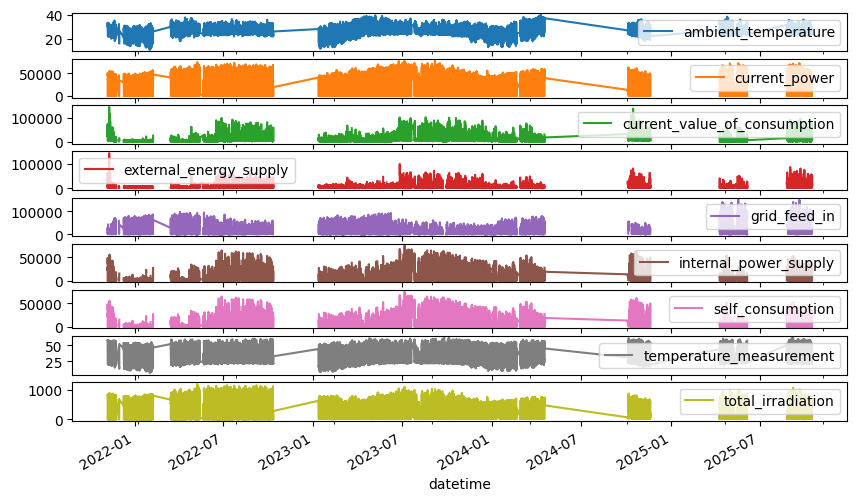

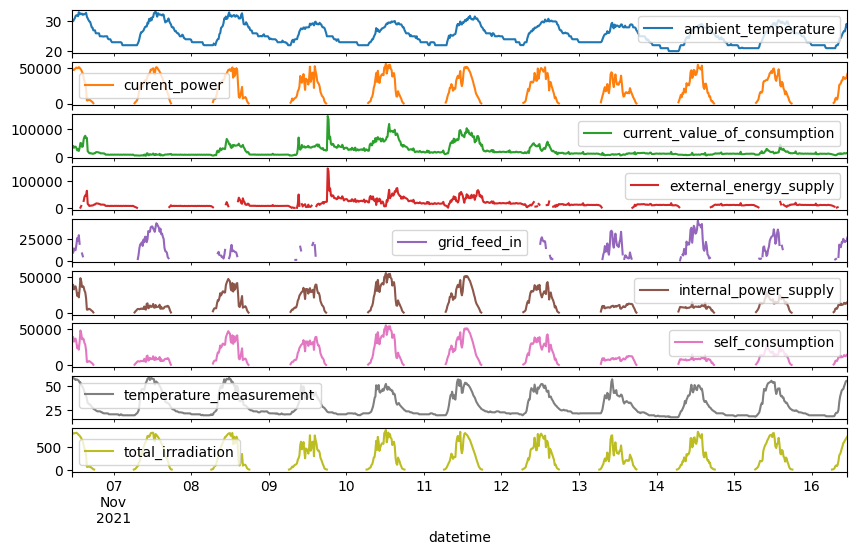

In [9]:
plot_cols = all_cols
plot_features = df[plot_cols]
plot_features.index = df.index
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:960]
plot_features.index = df.index[:960]
_ = plot_features.plot(subplots=True)

In [10]:
print("\nจำนวน Missing Values ก่อนทำการ fill:")
for col in all_cols:
    if col in df.columns:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f"  {col}: {missing_count} missing values")


จำนวน Missing Values ก่อนทำการ fill:
  ambient_temperature: 18 missing values
  current_power: 40315 missing values
  current_value_of_consumption: 9064 missing values
  external_energy_supply: 26386 missing values
  grid_feed_in: 54504 missing values
  internal_power_supply: 48973 missing values
  self_consumption: 48973 missing values
  temperature_measurement: 18 missing values
  total_irradiation: 43827 missing values
